In [1]:
import pandas as pd
from os import listdir
import os
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [2]:
rcParams['figure.figsize'] = 20,10
%matplotlib inline

### Read data

In [3]:
def read_data(dir_address, suffix='.txt'):
    
    ################################################################################################################
    # Reading input data
    ################################################################################################################
    year_list = range(1992,2021)
    df_raw = pd.DataFrame()
    filenames = listdir(dir_address)
    fileList = []

    for file, filename in enumerate(filenames):
        fileList.append(filenames[file].split('.')[0].split('_')[0])
        df_oneYear = pd.read_csv(os.path.join(dir_address, filenames[file]),low_memory=False)
        df_oneYear.insert(2, 'Year', year_list[file])
        df_raw = pd.concat([df_raw, df_oneYear])
        
        
        #unique_str = df['STRUCTURE_NUMBER_008'].unique()
        
        # Attributes to keep
        # STRUCTURE_NUMBER_008
        # Year
        # YEAR_BUILT_027
        # ADT_029
        # MAIN_UNIT_SPANS_045
        # APPR_SPANS_046
        # MAX_SPAN_LEN_MT_048
        # STRUCTURE_LEN_MT_049
        # SUPERSTRUCTURE_COND_059
        # SUBSTRUCTURE_COND_060
        # YEAR_RECONSTRUCTED_106
        # PERCENT_ADT_TRUCK_109
    df_raw = df_raw[['STRUCTURE_NUMBER_008', 'Year', 'YEAR_BUILT_027', 'ADT_029', 'MAIN_UNIT_SPANS_045', 'APPR_SPANS_046',
                'MAX_SPAN_LEN_MT_048', 'STRUCTURE_LEN_MT_049', 'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060',
                 'YEAR_RECONSTRUCTED_106', 'PERCENT_ADT_TRUCK_109']]

        # constructing data (summary) for each bridge
        # col1 col2  col3      col4     col5   col6   col7   col8
        # Age  ADT  nSpans  MaxSpanLen strLen  ADTT  SupRat SubRat
    
    return filenames, fileList, df_raw

In [4]:
def data_preprocessing(df):
    pd.options.mode.chained_assignment = None
    df_order = pd.DataFrame()
    bridge_list= df.STRUCTURE_NUMBER_008.unique().tolist()
    
    for bridge, bridges in enumerate(bridge_list):
        df_single_bridge = df.loc[df.STRUCTURE_NUMBER_008 == bridge_list[bridge]]
        
        # Missing Values ---------------------------------------------------------------------------------------
        df1 = df_single_bridge.dropna(subset=['SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060'])
        df1 = df1[df1.SUPERSTRUCTURE_COND_059 != 'N']
        df1 = df1[df1.SUBSTRUCTURE_COND_060 != 'N']
        
        # drop rows with nan in YEAR_BUILT_027
        df2 = df1.dropna(subset=['YEAR_BUILT_027'])
        
        # Fill in missing data in ADT_029 with mean
#         result = df2.ADT_029.fillna(df2.ADT_029.mean())
#         df2.ADT_029 = result
        df2.ADT_029.fillna(method='bfill', inplace=True)
        
        # Fill in missing data in ADT_029 with most common values
        #df2.MAIN_UNIT_SPANS_045.fillna(df2.MAIN_UNIT_SPANS_045.mode(), inplace=True)
        df2.MAIN_UNIT_SPANS_045.fillna(method='bfill', inplace=True)
        
        
        # Fill in missing data in APPR_SPANS_046 with most common values
        #df2.APPR_SPANS_046.fillna(df2.APPR_SPANS_046.mode(), inplace=True)
        df2.APPR_SPANS_046.fillna(method='bfill', inplace=True)
        
        # Fill in missing data in MAX_SPAN_LEN_MT_048 with most common values
        #df2.MAX_SPAN_LEN_MT_048.fillna(df2.MAX_SPAN_LEN_MT_048.mode(), inplace=True)
        df2.MAX_SPAN_LEN_MT_048.fillna(method='bfill', inplace=True)
        
        # Fill in missing data in STRUCTURE_LEN_MT_049 with most common values
        #df2.STRUCTURE_LEN_MT_049.fillna(df2.STRUCTURE_LEN_MT_049.mode(), inplace=True)
        df2.STRUCTURE_LEN_MT_049.fillna(method='bfill', inplace=True)
        
        # Fill in missing data in YEAR_RECONSTRUCTED_106 with 0
        #df2.STRUCTURE_LEN_MT_049.fillna(0.0, inplace=True)
        df2.STRUCTURE_LEN_MT_049.fillna(method='bfill', inplace=True)
        
        # Fill in missing data in PERCENT_ADT_TRUCK_109 with most common value
        #df2.PERCENT_ADT_TRUCK_109.fillna(df2.PERCENT_ADT_TRUCK_109.mode(), inplace=True)
        df2.PERCENT_ADT_TRUCK_109.fillna(method='bfill', inplace=True)
        
        # build the main dataframe
        df_order = pd.concat([df_order, df2])
        
    # drop the rest of the missing values
    df_final = df_order.dropna()
    
    # output data as a numpy array
    df_data = df_final.iloc[:,1:]
    data = df_data.to_numpy(dtype='float64')
    
    # create X
    X = np.delete(data, [7,8], axis=1)
    
    # Normalize X
    trans = MinMaxScaler()
    X = trans.fit_transform(X)
    
    # create Y
    Y1 = data[:,7]
    Y2 = data[:,8]
    
    # Transform categorical data with One Hot Encoding
    encoder1 = OneHotEncoder(sparse=False)
    Y1 = encoder1.fit_transform(Y1.reshape(-1,1))
    
    encoder2 = OneHotEncoder(sparse=False)
    Y2 = encoder2.fit_transform(Y2.reshape(-1,1))
        
    return bridge_list, df_order, data, X, Y1, Y2

In [5]:
dir_address = 'E:\Files\OneDrive - University of Maryland\PhD research\Python\ENCE 688U\Project\MD'
#dir_address = 'D:\OneDrive Files\OneDrive - University of Maryland\PhD research\Python\ENCE 688U\Project\MD'

In [6]:
filenames, fileList, df_raw = read_data(dir_address)

In [7]:
bridge_list, df_order, data, X, Y1, Y2 = data_preprocessing(df_raw)

In [8]:
df_order

,STRUCTURE_NUMBER_008,Year,YEAR_BUILT_027,ADT_029,MAIN_UNIT_SPANS_045,APPR_SPANS_046,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,YEAR_RECONSTRUCTED_106,PERCENT_ADT_TRUCK_109
0,100000010001010,1992,1957.0,8900.0,1.0,0.0,17.4,18.6,8,6,1985.0,8.0
0,100000010001010,1993,1957.0,8900.0,1.0,0.0,17.4,18.6,8,6,1985.0,8.0
0,100000010001010,1994,1957.0,8500.0,1.0,0.0,17.4,18.6,8,6,1985.0,8.0
9,100000010001010,1995,1957.0,8500.0,1.0,0.0,17.4,18.6,8,8,1985.0,8.0
12,100000010001010,1996,1957.0,8500.0,1.0,0.0,17.4,18.6,8,8,1985.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4251,200000HO0264010,2020,1995.0,50.0,1.0,0.0,19.8,20.4,7,7,NaN,0.0
4260,200000HO0273010,2020,2000.0,25.0,1.0,0.0,7.0,7.0,8,8,NaN,0.0
4261,200000HO0274010,2020,2000.0,30.0,1.0,0.0,7.0,7.9,8,8,NaN,0.0
4265,200000HO0279010,2020,1998.0,25.0,2.0,0.0,3.4,8.2,7,8,NaN,0.0


In [9]:
for i in range(len(df_raw.columns)):
    print("Number of missing values in: {}: {}".format(df_raw.columns[i], df_raw.iloc[:,i].isnull().sum()))

Number of missing values in: STRUCTURE_NUMBER_008: 0
Number of missing values in: Year: 0
Number of missing values in: YEAR_BUILT_027: 2155
Number of missing values in: ADT_029: 1229
Number of missing values in: MAIN_UNIT_SPANS_045: 19416
Number of missing values in: APPR_SPANS_046: 19294
Number of missing values in: MAX_SPAN_LEN_MT_048: 2895
Number of missing values in: STRUCTURE_LEN_MT_049: 1552
Number of missing values in: SUPERSTRUCTURE_COND_059: 18323
Number of missing values in: SUBSTRUCTURE_COND_060: 18305
Number of missing values in: YEAR_RECONSTRUCTED_106: 22825
Number of missing values in: PERCENT_ADT_TRUCK_109: 39203


In [10]:
for i in range(len(df_order.columns)):
    print("Number of missing values in: {}: {}".format(df_order.columns[i], df_order.iloc[:,i].isnull().sum()))

Number of missing values in: STRUCTURE_NUMBER_008: 0
Number of missing values in: Year: 0
Number of missing values in: YEAR_BUILT_027: 0
Number of missing values in: ADT_029: 16
Number of missing values in: MAIN_UNIT_SPANS_045: 18
Number of missing values in: APPR_SPANS_046: 6
Number of missing values in: MAX_SPAN_LEN_MT_048: 23
Number of missing values in: STRUCTURE_LEN_MT_049: 1
Number of missing values in: SUPERSTRUCTURE_COND_059: 0
Number of missing values in: SUBSTRUCTURE_COND_060: 0
Number of missing values in: YEAR_RECONSTRUCTED_106: 2183
Number of missing values in: PERCENT_ADT_TRUCK_109: 1666


In [11]:
for i in range(data.shape[1]):
    print("Number of missing values in {}: {}".format(df_order.columns[i], np.isnan(data[:,i]).sum()))

Number of missing values in STRUCTURE_NUMBER_008: 0
Number of missing values in Year: 0
Number of missing values in YEAR_BUILT_027: 0
Number of missing values in ADT_029: 0
Number of missing values in MAIN_UNIT_SPANS_045: 0
Number of missing values in APPR_SPANS_046: 0
Number of missing values in MAX_SPAN_LEN_MT_048: 0
Number of missing values in STRUCTURE_LEN_MT_049: 0
Number of missing values in SUPERSTRUCTURE_COND_059: 0
Number of missing values in SUBSTRUCTURE_COND_060: 0
Number of missing values in YEAR_RECONSTRUCTED_106: 0


### Exploratory Data Analysis

Text(0, 0.5, 'Number of Missing Values')

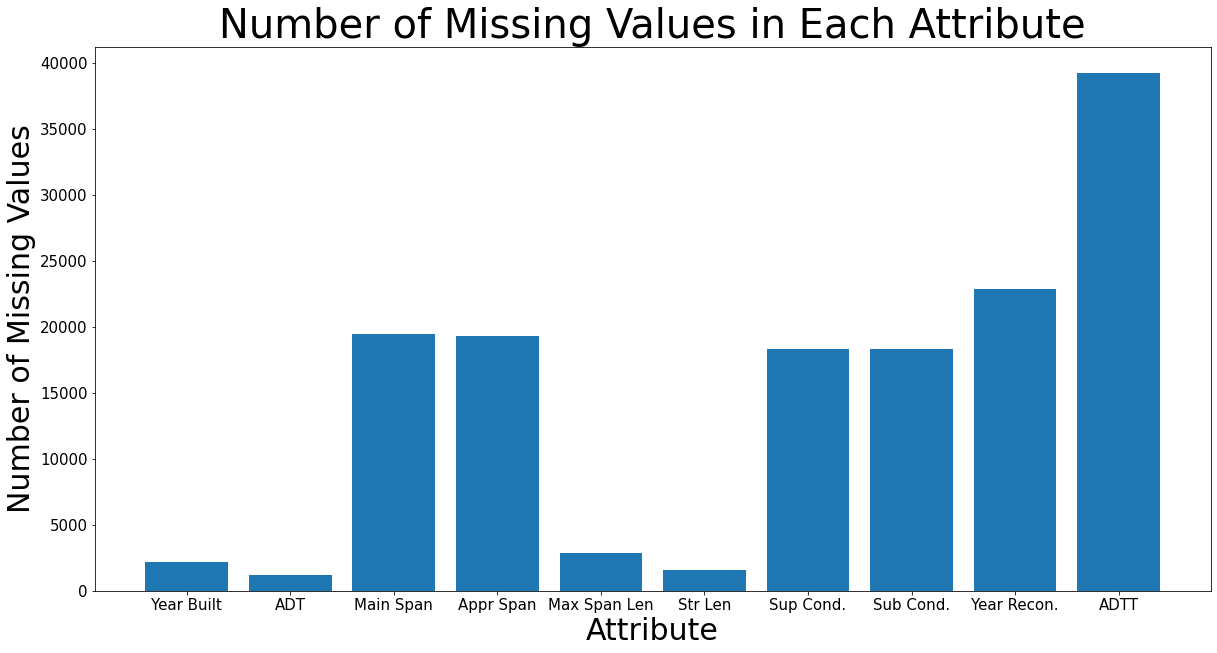

In [12]:
# plot distribution of missing values
plt.rcParams.update({'font.size': 15})
col = ['Year Built', 'ADT', 'Main Span', 'Appr Span', 'Max Span Len', 'Str Len', 'Sup Cond.', 'Sub Cond.', 'Year Recon.', 'ADTT']

miss = []
for i in range(2,len(df_raw.columns)):
    miss.append(df_raw.iloc[:,i].isnull().sum())
    
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(col, miss)
ax.set_title('Number of Missing Values in Each Attribute', fontsize=40)
ax.set_xlabel("Attribute", fontsize=30)
ax.set_ylabel('Number of Missing Values', fontsize=30)

Text(0, 0.5, 'Counts')

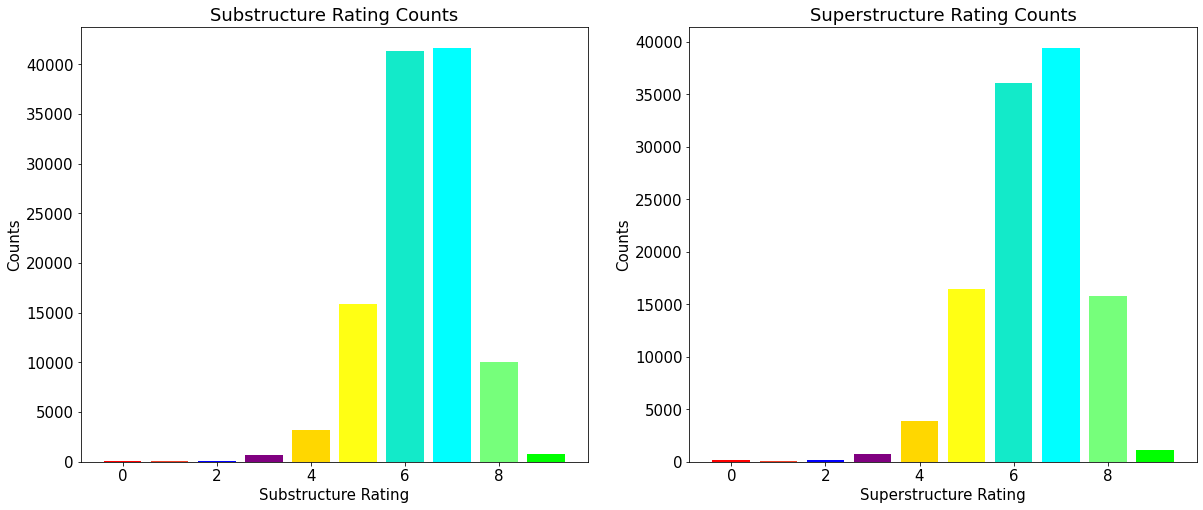

In [13]:
# plot distribution of condition ratings
# Substructure rating
sub_rat = df_order.SUBSTRUCTURE_COND_060.value_counts().to_dict()
sub_rat = dict(sorted(sub_rat.items()))
sub_rat_keys = list(sub_rat.keys())

Subrat = []
Subrat_num = []

for i in range(len(sub_rat_keys)):
    Subrat.append(float((sub_rat_keys[i])))
    Subrat_num.append(sub_rat.get(sub_rat_keys[i]))
    
# Superstructure rating
sup_rat = df_order.SUPERSTRUCTURE_COND_059.value_counts().to_dict()
sup_rat = dict(sorted(sup_rat.items()))
sup_rat_keys = list(sup_rat.keys())

Suprat = []
Suprat_num = []

for i in range(len(sup_rat_keys)):
    Suprat.append(float((sup_rat_keys[i])))
    Suprat_num.append(sup_rat.get(sup_rat_keys[i]))
    
# bar plots
fig_2 = plt.figure(figsize=(20,8))
plt.subplots_adjust(hspace = 0.3)
colors = ['#FF0000', '#EF4026', '#0000FF', '#800080', '#FFD700', '#FFFF14', '#13EAC9', '#00FFFF', '#76FF7B', '#00FF00']
ax1 = fig_2.add_subplot(1,2,1)
ax1.bar(Subrat, Subrat_num, color=colors)
ax1.set_title('Substructure Rating Counts')
ax1.set_xlabel('Substructure Rating')
ax1.set_ylabel('Counts')

ax2 = fig_2.add_subplot(1,2,2)
ax2.bar(Suprat, Suprat_num, color=colors)
ax2.set_title('Superstructure Rating Counts')
ax2.set_xlabel('Superstructure Rating')
ax2.set_ylabel('Counts')

### Create training and testing sets

In [14]:
X_train, X_test = X[:88065,:], X[88065:,:]
Y1_train, Y1_test = Y1[:88065,:], Y1[88065,:]
Y2_train, Y2_test = Y2[:88065,:], Y2[88065,:]

In [15]:
Y1_train.shape

(88065, 10)

In [16]:
X_train.shape[0]

88065

In [17]:
Y1_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

### Building the neural network

In [18]:
from keras import models
from keras import layers

In [19]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu',))
model.add(layers.Dense(128, activation='relu',))
model.add(layers.Dense(128, activation='relu',))
model.add(layers.Dense(128, activation='relu',))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Validation data

In [20]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]

Y1_val = Y1_train[:1000]
partial_Y1_train = Y1_train[1000:]

Y2_val = Y2_train[:1000]
partial_Y2_train = Y2_train[1000:]

### train the model

In [21]:
history = model.fit(partial_X_train,
                    partial_Y1_train,
                    epochs=100,
                    batch_size=50,
                    validation_data=(X_val, Y1_val))

Epoch 1/100
1742/1742 [==============================] - 2s 1ms/step - loss: 1.4723 - accuracy: 0.3754 - val_loss: 1.6512 - val_accuracy: 0.2130
Epoch 2/100
1742/1742 [==============================] - 2s 1ms/step - loss: 1.4247 - accuracy: 0.4039 - val_loss: 1.4624 - val_accuracy: 0.2770
Epoch 3/100
1742/1742 [==============================] - 2s 1ms/step - loss: 1.3263 - accuracy: 0.4455 - val_loss: 1.3146 - val_accuracy: 0.4000
Epoch 4/100
1742/1742 [==============================] - 2s 1ms/step - loss: 1.2791 - accuracy: 0.4644 - val_loss: 1.3124 - val_accuracy: 0.3970
Epoch 5/100
1742/1742 [==============================] - 2s 1ms/step - loss: 1.2611 - accuracy: 0.4695 - val_loss: 1.3216 - val_accuracy: 0.4120
Epoch 6/100
1742/1742 [==============================] - 2s 1ms/step - loss: 1.2502 - accuracy: 0.4758 - val_loss: 1.2764 - val_accuracy: 0.3630
Epoch 7/100
1742/1742 [==============================] - 2s 1ms/step - loss: 1.2440 - accuracy: 0.4778 - val_loss: 1.2205 - val_ac

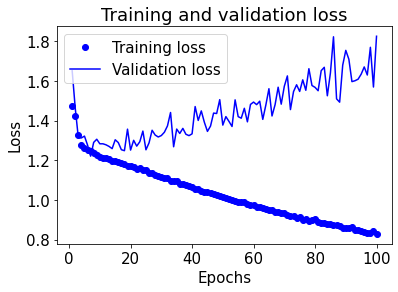

In [22]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

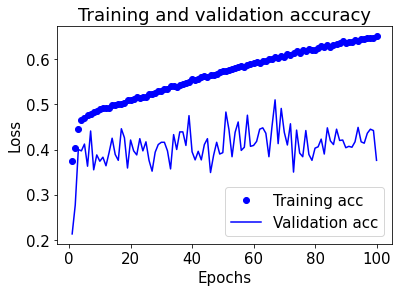

In [23]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
pred = model.predict(X_test)

In [25]:
pred[0]

array([7.0972712e-19, 7.1442013e-10, 4.2084543e-04, 1.4788188e-03,
       3.0606726e-02, 1.2181138e-01, 2.4445185e-01, 5.8523577e-01,
       1.5714759e-02, 2.7983729e-04], dtype=float32)

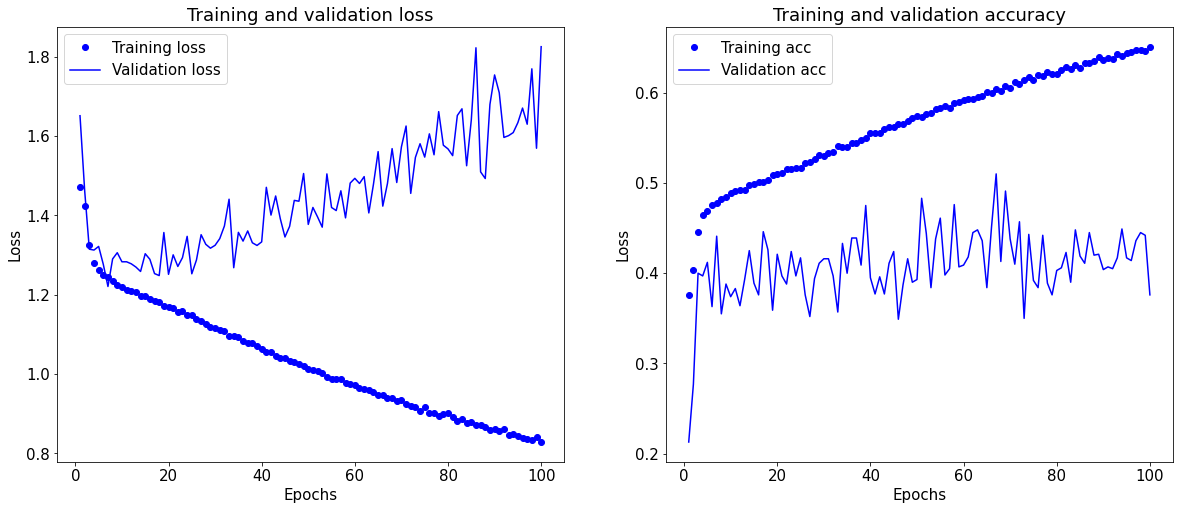

In [26]:
# line plots
fig_3 = plt.figure(figsize=(20,8))
plt.subplots_adjust(hspace = 0.3)
ax3 = fig_3.add_subplot(1,2,1)
ax3.plot(epochs, loss, 'bo', label='Training loss')
ax3.plot(epochs, val_loss, 'b', label='Validation loss')
ax3.set_title('Training and validation loss')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Loss')
ax3.legend()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

ax4 = fig_3.add_subplot(1,2,2)
ax4.plot(epochs, acc, 'bo', label='Training acc')
ax4.plot(epochs, val_acc, 'b', label='Validation acc')
ax4.set_title('Training and validation accuracy')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Loss')
ax4.legend()